In [15]:
import sys, os
import pathlib
import time
import importlib
import joblib
import pickle
import shutil
from tqdm import tqdm

import numpy as np

from scipy.linalg import null_space
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt

import cv2
import open3d as o3d

from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [21]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

def plot_graph():
    color_arr = np.array([[255,0,0],[0,255,0],[0,0,255],
                             [255,255,0],[255,0,255],[0,255,255],
                             [127,127,127],[127,0,127],[0,127,127]],dtype = np.int16)
    j = 0
    for i in range(len(cfs)):
        for frag in cfs[i]:
            if j % 1 != 0:
                j+=1
                continue
            j+=1
            if frag.size < 10:
                continue
            if i != 7:
                continue
            
            x = frag[:,0]
            y = frag[:,1]
            z = frag[:,2]
            data = [x,y,z]
            try:
                tck, u= interpolate.splprep(data, k=3)
            except ValueError:
                pass
            except TypeError:
                pass
            except UnboundLocalError:
                pass
            new = interpolate.splev(u, tck, der=0)
            c = color_arr[i]/255
            ax.plot(new[0], new[1], new[2],"-", color="#920092")
    load_mesh("../simlation_data/preprocessing/polygon/quan_e_a/q_1_a.ply")

def load_cfs(file_path):
    with open(file_path, "rb") as f:
        curve_fragments = pickle.load(f)
    return curve_fragments

def load_mesh(mesh_path):
    mesh = o3d.io.read_triangle_mesh(mesh_path)
    mesh.triangles = o3d.utility.Vector3iVector(np.asarray(mesh.triangles)[np.asarray(mesh.cluster_connected_triangles()[0])==7])# i
    #mesh.vertices = o3d.utility.Vector3iVector(ver)
    ver = np.asarray(mesh.vertices)[np.unique(np.asarray(mesh.triangles))]
    x, y, z = ver[:,0], ver[:,1], ver[:,2]
    ax.plot_trisurf(x, y, z, shade=False, alpha=0.7, color="#1AFF1A")

In [24]:
cfs = load_cfs("data/supported_curve/5_supported_curves.pickle")

<IPython.core.display.Javascript object>


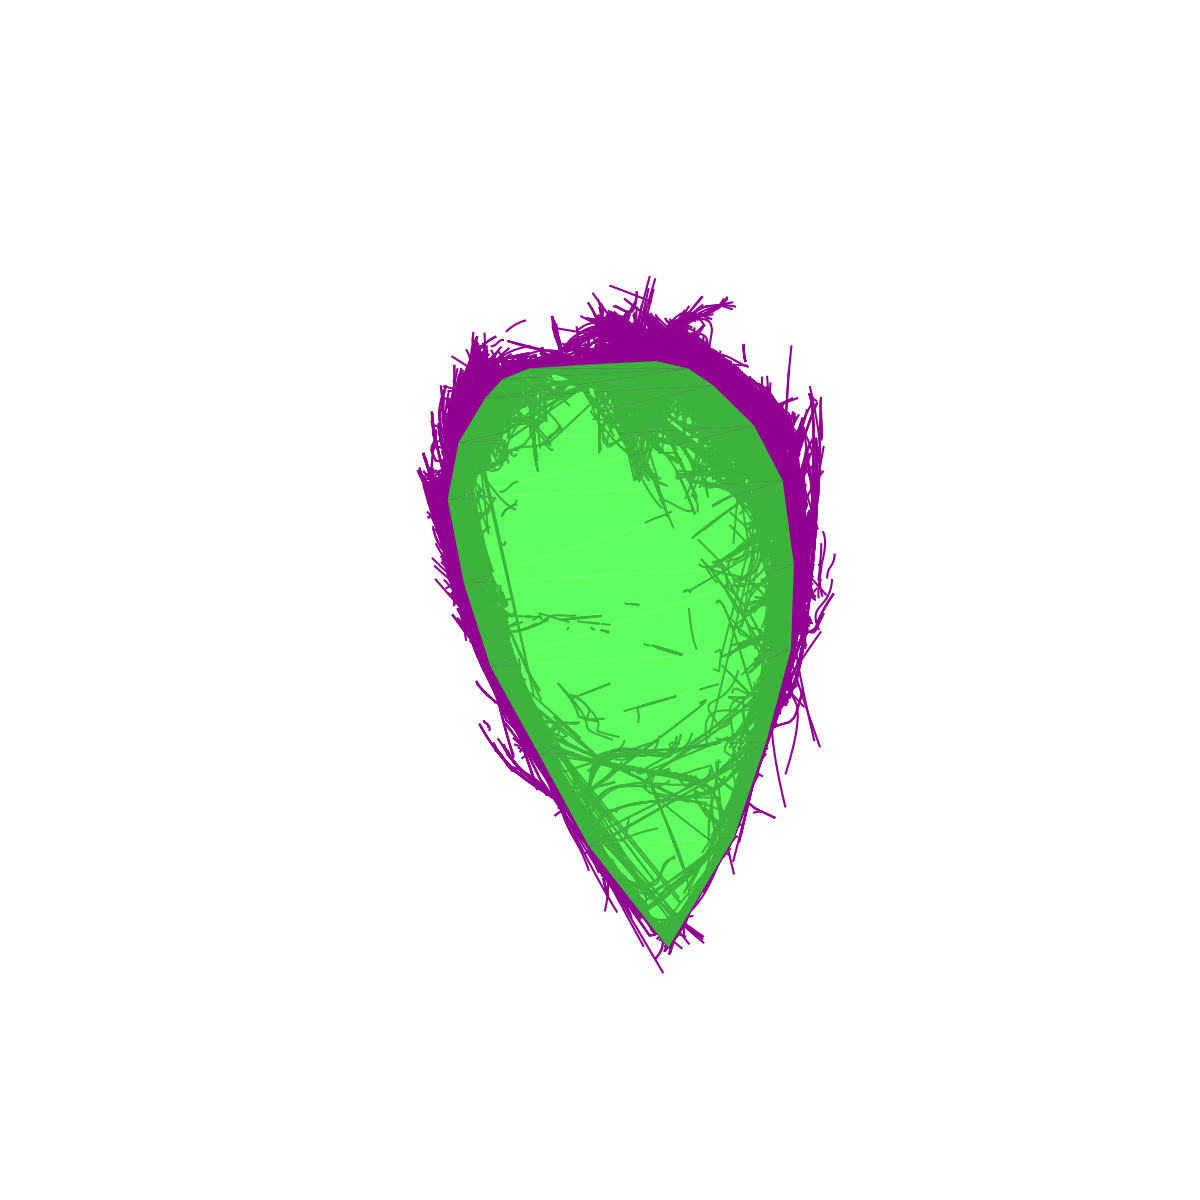

In [25]:
fig = plt.figure(figsize = (12, 12))
fig.patch.set_alpha(0.)
# 3DAxesを追加
ax = fig.add_subplot(111, projection='3d')
ax.axis("off")
# 軸ラベルを設定
ax.set_xlabel("x", size = 14)
ax.set_ylabel("z", size = 14)
ax.set_zlabel("y", size = 14)
ax.set_box_aspect((1,1,1))

plot_graph()